In [1]:
!pip install kaggle

In [2]:
#configure the path of kaggle.jason file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing face mask data


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
#extraction of compressed dataset
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing dependancy


In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_1894.jpg', 'with_mask_631.jpg', 'with_mask_218.jpg', 'with_mask_2634.jpg', 'with_mask_696.jpg']


In [8]:
with_mask_files=os.listdir('/content/data/with_mask')

In [9]:
without_mask_files=os.listdir('/content/data/without_mask')

In [10]:
print('number of masked data: ', len(with_mask_files))
print('number of without_mask data: ', len(without_mask_files))

number of masked data:  3725
number of without_mask data:  3828


Labelling for two class images

With mask--> 1
Without mask-->0

In [11]:
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [12]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying images

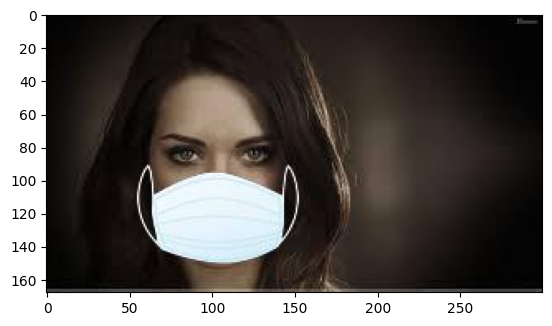

In [13]:
img=mpimg.imread('/content/data/with_mask/with_mask_1607.jpg')
imgplot=plt.imshow(img)
plt.show()

Image Processing

1) resize images
2)convert into numpy array


In [14]:
#with mask
with_mask_path='/content/data/with_mask/'

data=[]

for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'


for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
len(data)

7553

In [16]:
labels = with_mask_labels + without_mask_labels

X=np.array(data)
Y=np.array(labels)

Splitting Training and Testing Data

In [17]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size=0.2, stratify=Y,random_state=2)

In [18]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [19]:
X_test_scaled=X_test/100

X_train_scaled=X_train/100

#X_train[0]
X_train_scaled[0]

array([[[0.  , 0.03, 0.14],
        [0.01, 0.05, 0.16],
        [0.01, 0.05, 0.16],
        ...,
        [0.12, 0.39, 0.89],
        [0.16, 0.37, 0.84],
        [0.07, 0.19, 0.58]],

       [[0.  , 0.02, 0.14],
        [0.  , 0.02, 0.14],
        [0.  , 0.02, 0.14],
        ...,
        [0.15, 0.42, 0.94],
        [0.14, 0.4 , 0.88],
        [0.06, 0.28, 0.69]],

       [[0.  , 0.02, 0.14],
        [0.  , 0.02, 0.14],
        [0.  , 0.01, 0.13],
        ...,
        [0.26, 0.49, 1.02],
        [0.23, 0.48, 0.99],
        [0.13, 0.36, 0.83]],

       ...,

       [[0.  , 0.02, 0.14],
        [0.  , 0.02, 0.14],
        [0.  , 0.02, 0.14],
        ...,
        [2.07, 2.  , 2.06],
        [2.02, 2.03, 2.18],
        [1.49, 1.56, 1.88]],

       [[0.  , 0.02, 0.14],
        [0.  , 0.02, 0.14],
        [0.  , 0.02, 0.14],
        ...,
        [2.07, 1.99, 2.08],
        [2.05, 2.05, 2.16],
        [1.61, 1.68, 1.92]],

       [[0.  , 0.03, 0.15],
        [0.  , 0.02, 0.14],
        [0.  , 0

In [20]:
Y_train_scaled=Y_train/100

#Y_train[0]
Y_train_scaled[0]

0.01

Building CNN(Convolution neural network)


In [21]:
import tensorflow as tf
from tensorflow import keras

In [22]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))


In [23]:
#compile neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [24]:
#training train data
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 26ms/step - loss: 0.5266 - acc: 0.7734 - val_loss: 0.2165 - val_acc: 0.9107
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2911 - acc: 0.8882 - val_loss: 0.1775 - val_acc: 0.9273
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2266 - acc: 0.9126 - val_loss: 0.1908 - val_acc: 0.9289
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1837 - acc: 0.9266 - val_loss: 0.1549 - val_acc: 0.9421
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1509 - acc: 0.9454 - val_loss: 0.2019 - val_acc: 0.9388


Model Evaluation

In [26]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy:',accuracy)
print('loss:',loss)

48/48 [==============================] - 0s 7ms/step - loss: 0.2441 - acc: 0.9212
Test Accuracy: 0.921244204044342
loss: 0.24414761364459991


Path of the image to be predicted: /content/Test.png


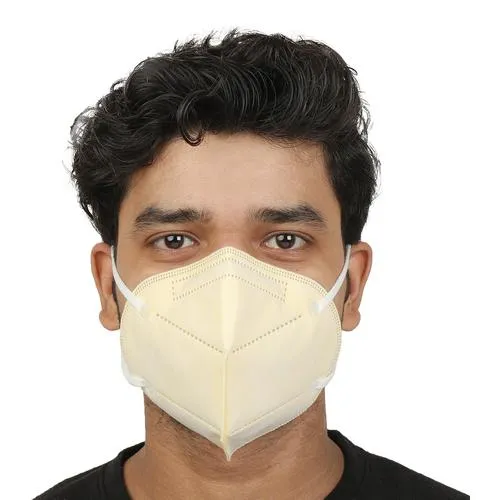

1/1 [==============================] - 0s 354ms/step
[[0.40555003 0.84796137]]
1
The person in the image is wearing a mask


In [27]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')